# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.


In [1]:
import sys
print(sys.executable)

/Users/gracesaunders/Documents/GitHub/EDA2/.venv/bin/python


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
fg = pd.read_csv('/Users/gracesaunders/Documents/GitHub/EDA2/assignment/data/ForeignGifts_edu.csv')
fg.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.


In [13]:
#pd.set_option('display.float_format', '{:.2f}'.format)
fg['Foreign Gift Amount'].describe()

count      28221.00
mean      588232.72
std      3222011.43
min      -537770.00
25%         5700.00
50%        94615.00
75%       376142.00
max     99999999.00
Name: Foreign Gift Amount, dtype: float64

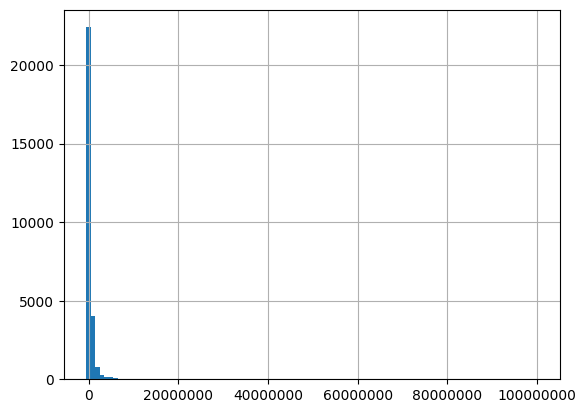

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
...,...,...,...,...,...,...,...,...,...,...
28216,28217,4279700,Albert Einstein College of Medicine,Bronx,NY,42704,381717,Contract,CHINA,Chia Tai TianQing Pharmaceutical Gr
28217,28218,4279700,Albert Einstein College of Medicine,Bronx,NY,42778,444938,Contract,ISRAEL,BL Oncology Ltd
28218,28219,4279700,Albert Einstein College of Medicine,Bronx,NY,42907,1064580,Contract,ENGLAND,Roche Products Limited
28219,28220,4279700,Albert Einstein College of Medicine,Bronx,NY,42948,737375,Contract,SWITZERLAND,F Hoffman-La Roche Ltd


In [11]:
fg['Foreign Gift Amount'].hist(bins=100)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

Not very useful histogram because of the long tail, so I made an arcsinh() one too to see the distribution better (not log, because it would've removed the negatives, although maybe that's good? some weird values for min & max)

<Axes: >

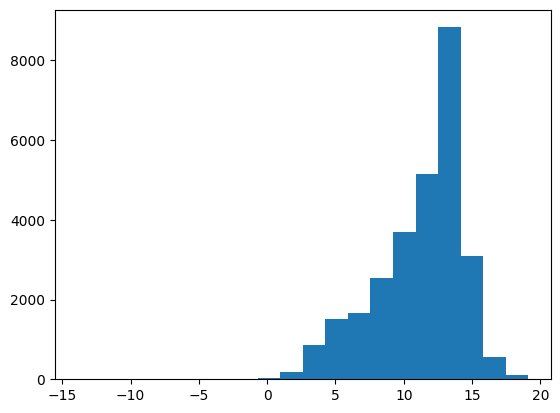

In [19]:
fg['amount_arcsinh'] = np.arcsinh(fg['Foreign Gift Amount'])
fg['amount_arcsinh'].hist(bins=20,grid=False) 

3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?


In [25]:
fg['Gift Type'].value_counts()

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64

In [26]:
def proportion(x):
    return x/fg['Gift Type'].count() * 100
fg['Gift Type'].value_counts().apply(proportion)

Gift Type
Contract        61.21
Monetary Gift   38.75
Real Estate      0.04
Name: count, dtype: float64

4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?


In [28]:
import seaborn as sns

<Axes: xlabel='amount_log', ylabel='Density'>

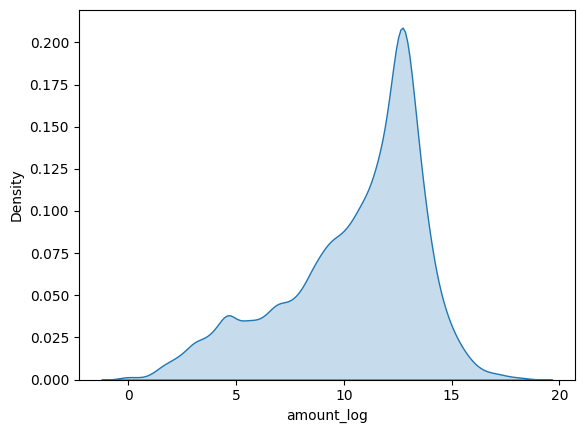

In [32]:
fg['amount_log'] = fg['Foreign Gift Amount'].apply(np.log)
sns.kdeplot(fg['amount_log'], fill=True)

[Text(0.5, 1.0, 'Foreign Gift Amount (log) by Gift Type')]

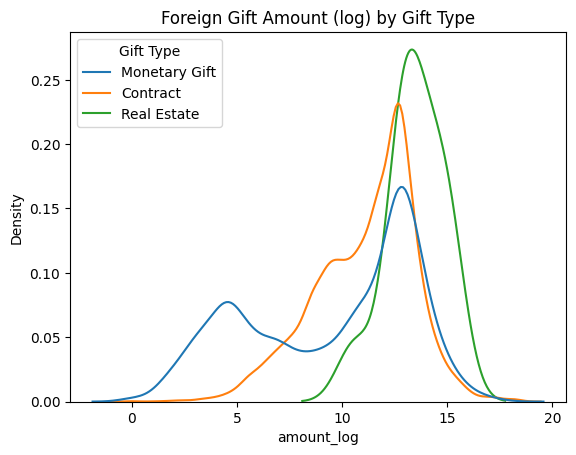

In [33]:
conditioning = 'Gift Type'
var = 'amount_log' 
sns.kdeplot( data=fg, x=var, hue=conditioning, common_norm=False).set(title='Foreign Gift Amount (log) by Gift Type')

The aggregate plot has a small peak and then a main peak a little below 15, but the grouped plot shows the different trends in amounts by gift types, where monetary gifts account for small peak while real estate and contracts account for most of the larger peak. 

5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?


In [35]:
fg['Country of Giftor'].value_counts().head(15)

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

In [36]:
fg['Foreign Gift Amount'].groupby(fg['Country of Giftor']).sum().sort_values(ascending=False).head(15)

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64

6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 


In [39]:
fg['Foreign Gift Amount'].groupby(fg['Institution Name']).sum().sort_values(ascending=False).head(15)

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64

<Axes: >

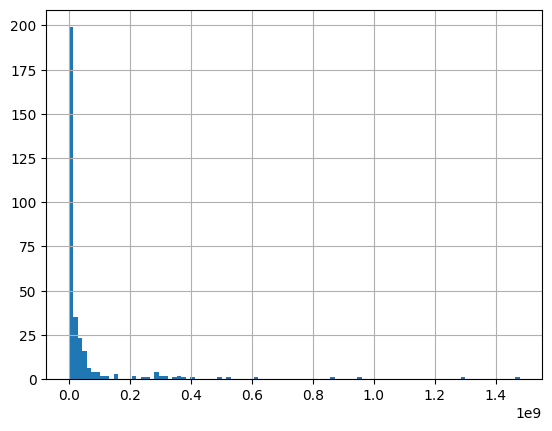

In [42]:
fg['Foreign Gift Amount'].groupby(fg['Institution Name']).sum().hist(bins=100)

7. Which giftors provide the most money, in total?

In [43]:
fg['Foreign Gift Amount'].groupby(fg['Giftor Name']).sum().sort_values(ascending=False).head(15)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.


In [44]:
dr = pd.read_csv('/Users/gracesaunders/Documents/GitHub/EDA2/assignment/data/drilling_rigs.csv')

In [48]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Month                                                                                        623 non-null    object
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64 
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64 
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   623 non-null    object
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 623 non-null    object
 5   Crude Oil and Natural Gas Rotary Rigs in Op

In [49]:
dr.describe()

,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)"
count,623.00,623.00,623.00
mean,1246.05,98.94,1344.98
std,700.53,65.05,744.19
min,237.00,6.00,250.00
25%,725.50,48.50,795.50
50%,995.00,95.00,1068.00
75%,1707.50,125.00,1783.50
max,4238.00,283.00,4521.00


In [50]:
dr.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


It looks like some of the variables that should be numeric are objects instead, that have 'Not Available' instead of NaNs. Variables 0, 3-7, and 9 will need to be typecast. 

In [ ]:
v3 = 'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)'
v4 = 'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)'
v5 = 'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)'
v6 = 'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)'
v7 = 'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)'
v9 = 'Active Well Service Rig Count (Number of Rigs)'

vars = [v3, v4, v5, v6, v7, v9]

def clean_nums(x):
    dr[x] = pd.to_numeric(dr[x], errors='coerce')

for var in vars:
    clean_nums(var)


2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.


In [58]:
dr['time'] = pd.to_datetime(dr['Month'], format='mixed')

In [60]:
dr.describe()

,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs),time
count,623.00,623.00,448.00,448.00,407.00,407.00,407.00,623.00,591.00,623
mean,1246.05,98.94,500.43,546.19,423.33,174.65,465.09,1344.98,2627.98,1998-11-30 23:43:49.213483136
min,237.00,6.00,108.00,70.00,30.00,15.00,9.00,250.00,456.00,1973-01-01 00:00:00
25%,725.50,48.50,271.75,214.25,62.00,72.00,72.50,795.50,1994.00,1985-12-16 12:00:00
50%,995.00,95.00,397.00,425.00,335.00,174.00,528.00,1068.00,2549.00,1998-12-01 00:00:00
75%,1707.50,125.00,605.25,782.50,696.50,236.50,678.50,1783.50,3340.50,2011-11-16 00:00:00
max,4238.00,283.00,1593.00,1585.00,1369.00,404.00,1041.00,4521.00,5367.00,2024-11-01 00:00:00
std,700.53,65.05,346.15,393.43,386.30,106.72,309.19,744.19,1006.08,NaN


3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.


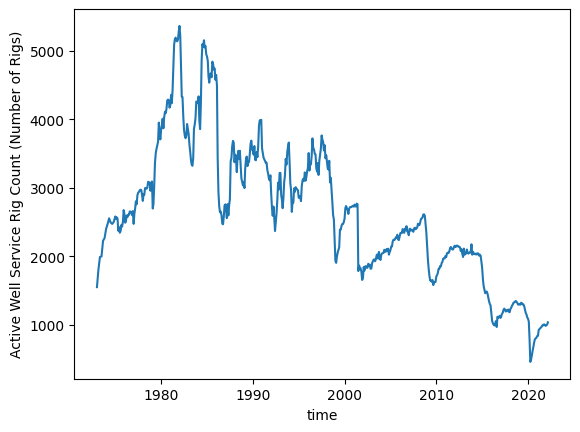

In [62]:
var = 'Active Well Service Rig Count (Number of Rigs)'
sns.lineplot(data=dr, x='time', y=var)
plt.show()

4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.


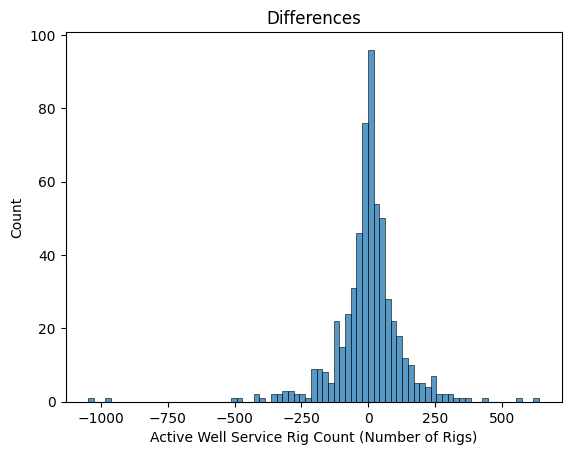

In [66]:
diff = dr[var].diff()

fig = sns.histplot(diff)
fig.set(title='Differences')
plt.show()

The first difference histogram has a longer tail to the left (negative net change), but it looks like this is from a few outliers and overall it has a minimal spread with even distribution centered around zero. Therefore, although there were several occasions of large drops in the number of active rigs, overall the general trend is minimal change. 

5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [76]:
on = 'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)'
off = 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'
melted = pd.melt(dr, id_vars=['time'], value_vars=[on, off],
                    var_name='Rig_Type', value_name='Number_of_Rigs')

melted.head()


,time,Rig_Type,Number_of_Rigs
0,1973-01-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,1120
1,1973-02-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,1037
2,1973-03-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,959
3,1973-04-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,914
4,1973-05-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,974


[Text(0.5, 1.0, 'On- & Offshore Rigs'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Proportion')]

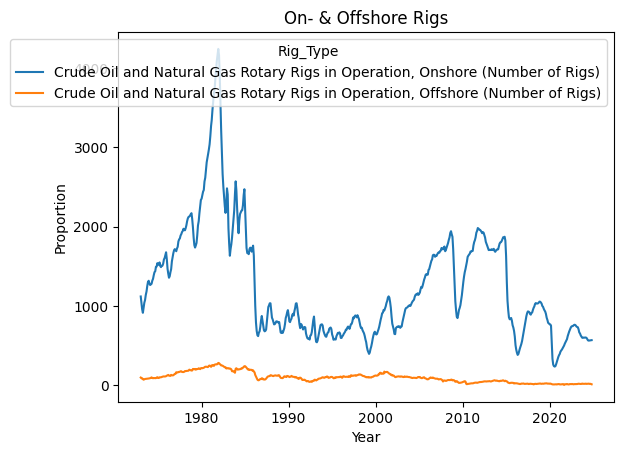

In [77]:
fig = sns.lineplot(data=melted,x='time',y='Number_of_Rigs',hue='Rig_Type')
fig.set(title='On- & Offshore Rigs',xlabel='Year',ylabel='Proportion')

Resulting plot shows that most of the variation is due to onshore rigs, not offshore.